In [1]:
from __future__ import print_function
%matplotlib inline
import argparse
import time
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.animation as animation
from IPython.display import HTML
from torchvision.utils import save_image
from torch.autograd import Variable
from pathlib import Path
from numpy import asarray
from PIL import Image

In [2]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [3]:
#print(heightDistributionreal)]
realfolder = "data/HTile128/img_align_HTile"
image_count =0
data_avg = np.zeros(128*128,)
for filename in os.listdir(realfolder):
    if filename.endswith(".jpg"): 
        imgreal = Image.open(realfolder+"/"+filename)
        image_count = image_count +1
        #imgfake1c = imgfake.convert('L')  #convert a gray scale
        #imgfake1c = imgfake1c.save(netGLoadDirectory+"/fakeImageData/"+filename)
        data = asarray(imgreal)
        data_avg = (data_avg+data.flatten())  
    else:
        continue

In [4]:
x = (data_avg/image_count).astype(int)
x =x.reshape(128,128)

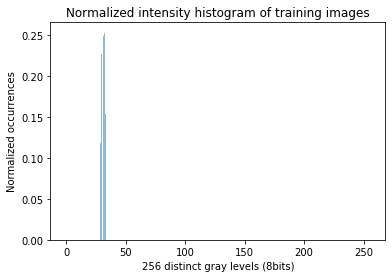

In [5]:
heightDistributionreal = [0]*256
for pix_val in (data_avg/image_count).astype(int):
    heightDistributionreal[pix_val]+=1
#plot
objects = tuple(range(0,256))
#print(objects)
#print(type(objects))
y_pos = np.arange(len(objects))
performance = heightDistributionreal

performance = np.asarray(performance, dtype=np.float32)
performance = performance/sum(performance)
plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
plt.ylabel('Normalized occurrences')
plt.xlabel('256 distinct gray levels (8bits)')
plt.title('Normalized intensity histogram of training images')
plt.show() 

In [25]:
y_pos.shape

(256,)

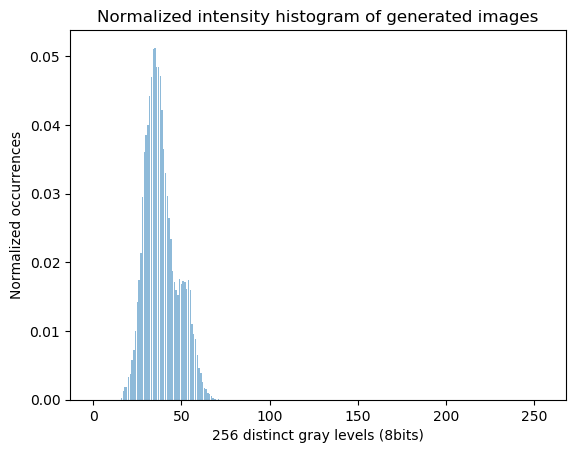

In [27]:
#print(heightDistributionreal)]
fakefolder = "HyperparameterData/LSGANadam0.0002l16b/testout"
image_count =0
data_avg = np.zeros(128*128,)
for filename in os.listdir(fakefolder):
    if filename.endswith(".png"): 
        imgfake = Image.open(fakefolder+"/"+filename)
        image_count = image_count +1
        imgfake1c = imgfake.convert('L')  #convert a gray scale
        #imgfake1c = imgfake1c.save(netGLoadDirectory+"/fakeImageData/"+filename)
        data = asarray(imgfake1c)
        data_avg = (data_avg+data.flatten())
    else:
        continue

heightDistributionfake = [0]*256
for pix_val in (data_avg/image_count).astype(int):
    heightDistributionfake[pix_val]+=1
#plot
objects = tuple(range(0,256))
#print(objects)
#print(type(objects))
y_pos = np.arange(len(objects))
performance = heightDistributionfake

performance = np.asarray(performance, dtype=np.float32)
performance = performance/sum(performance)
plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
plt.ylabel('Normalized occurrences')
plt.xlabel('256 distinct gray levels (8bits)')
plt.title('Normalized intensity histogram of generated images')
plt.show() 

In [28]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [29]:
hist_real = np.asarray(heightDistributionreal, dtype=np.float32)
hist_real = hist_real/sum(hist_real)
hist_real = hist_real + +10e-10

In [30]:
hist_fake = np.asarray(heightDistributionfake, dtype=np.float32)
hist_fake = hist_fake/sum(hist_fake)
hist_fake = hist_fake+10e-10

In [31]:
kl_divergence(hist_real, hist_fake)

1.6181868

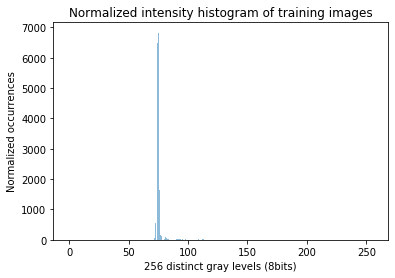

In [6]:
#print(heightDistributionreal)]
fakefolder = "HyperparameterData/LSGANSGD0.0001l16b/testout"
image_count =0
data_avg = np.zeros(128*128,)
for filename in os.listdir(fakefolder):
    if filename.endswith(".png"): 
        imgfake = Image.open(fakefolder+"/"+filename)
        image_count = image_count +1
        imgfake1c = imgfake.convert('L')  #convert a gray scale
        #imgfake1c = imgfake1c.save(netGLoadDirectory+"/fakeImageData/"+filename)
        data = asarray(imgfake1c)
        data_avg = (data_avg+data.flatten())
    else:
        continue
        
heightDistributionfake_sgd = [0]*256
for pix_val in (data_avg/image_count).astype(int):
    heightDistributionfake_sgd[pix_val]+=1
#plot
objects = tuple(range(0,256))
#print(objects)
#print(type(objects))
y_pos = np.arange(len(objects))
performance = heightDistributionfake_sgd

plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
plt.ylabel('Normalized occurrences')
plt.xlabel('256 distinct gray levels (8bits)')
plt.title('Normalized intensity histogram of training images')
plt.show() 

In [69]:
performance.index(max(performance))

75

In [78]:
hist_fake = np.asarray(performance, dtype=np.float32)
hist_fake = hist_fake/sum(hist_fake)
hist_fake = hist_fake+10e-10
kl_divergence(hist_real, hist_fake)

/home/icebergq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


inf

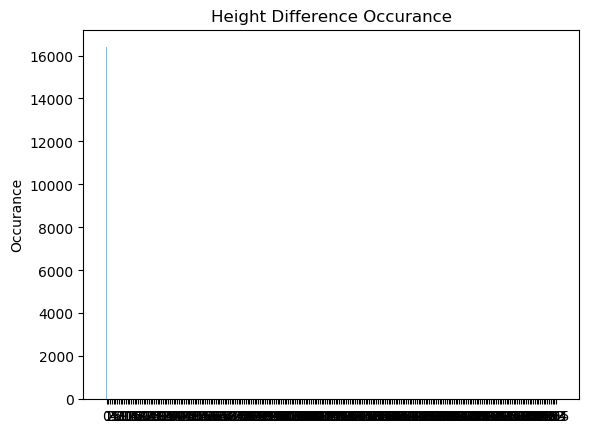

In [73]:
#print(heightDistributionreal)]
fakefolder = "HyperparameterData/LSGANRMSProp0.01l16b/testout"
image_count =0
data_avg = np.zeros(128*128,)
for filename in os.listdir(fakefolder):
    if filename.endswith(".png"): 
        imgfake = Image.open(fakefolder+"/"+filename)
        image_count = image_count +1
        imgfake1c = imgfake.convert('L')  #convert a gray scale
        #imgfake1c = imgfake1c.save(netGLoadDirectory+"/fakeImageData/"+filename)
        data = asarray(imgfake1c)
        data_avg = (data_avg+data.flatten())
    else:
        continue
        
heightDistributionfake = [0]*256
for pix_val in (data_avg/image_count).astype(int):
    heightDistributionfake[pix_val]+=1
#plot
objects = tuple(range(0,256))
#print(objects)
#print(type(objects))
y_pos = np.arange(len(objects))
performance = heightDistributionfake

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Occurance')
plt.title('Height Difference Occurance')
plt.show()

In [81]:
type(x)

int

In [76]:
hist_fake = np.asarray(performance, dtype=np.float32)
hist_fake = hist_fake/sum(hist_fake)
hist_fake = hist_fake+10e-10
kl_divergence(hist_real, hist_fake)

/home/icebergq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


inf

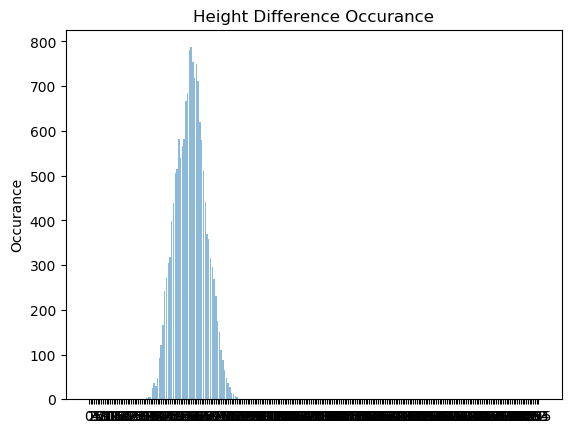

KL divergence is  17.286484
Peak index is  58


In [84]:
#print(heightDistributionreal)]
fakefolder = "HyperparameterData/LSGANadam0.0002l8b/testout"
image_count =0
data_avg = np.zeros(128*128,)
for filename in os.listdir(fakefolder):
    if filename.endswith(".png"): 
        imgfake = Image.open(fakefolder+"/"+filename)
        image_count = image_count +1
        imgfake1c = imgfake.convert('L')  #convert a gray scale
        #imgfake1c = imgfake1c.save(netGLoadDirectory+"/fakeImageData/"+filename)
        data = asarray(imgfake1c)
        data_avg = (data_avg+data.flatten())
    else:
        continue

heightDistributionfake = [0]*256
for pix_val in (data_avg/image_count).astype(int):
    heightDistributionfake[pix_val]+=1
#plot
objects = tuple(range(0,256))
#print(objects)
#print(type(objects))
y_pos = np.arange(len(objects))
performance = heightDistributionfake

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Occurance')
plt.title('Height Difference Occurance')
plt.show()


hist_fake = np.asarray(performance, dtype=np.float32)
hist_fake = hist_fake/sum(hist_fake)
hist_fake = hist_fake+10e-10
KL = kl_divergence(hist_real, hist_fake)
print("KL divergence is ", KL)
peak_index = performance.index(max(performance))
print("Peak index is ",peak_index)

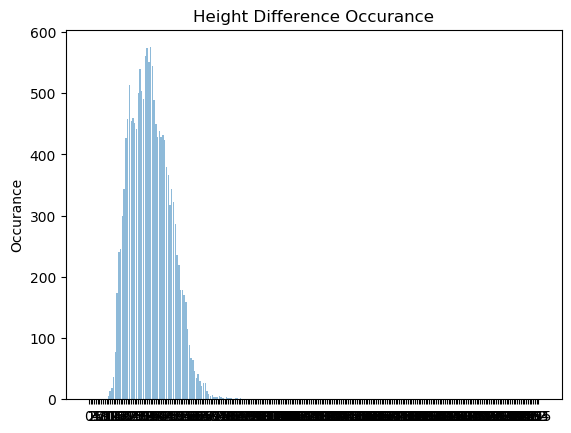

KL divergence is  1.8619535
Peak index is  35


In [85]:
#print(heightDistributionreal)]
fakefolder = "HyperparameterData/LSGANadam0.002l16b/testout"
image_count =0
data_avg = np.zeros(128*128,)
for filename in os.listdir(fakefolder):
    if filename.endswith(".png"): 
        imgfake = Image.open(fakefolder+"/"+filename)
        image_count = image_count +1
        imgfake1c = imgfake.convert('L')  #convert a gray scale
        #imgfake1c = imgfake1c.save(netGLoadDirectory+"/fakeImageData/"+filename)
        data = asarray(imgfake1c)
        data_avg = (data_avg+data.flatten())
    else:
        continue

heightDistributionfake = [0]*256
for pix_val in (data_avg/image_count).astype(int):
    heightDistributionfake[pix_val]+=1
#plot
objects = tuple(range(0,256))
#print(objects)
#print(type(objects))
y_pos = np.arange(len(objects))
performance = heightDistributionfake

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Occurance')
plt.title('Height Difference Occurance')
plt.show()


hist_fake = np.asarray(performance, dtype=np.float32)
hist_fake = hist_fake/sum(hist_fake)
hist_fake = hist_fake+10e-10
KL = kl_divergence(hist_real, hist_fake)
print("KL divergence is ", KL)
peak_index = performance.index(max(performance))
print("Peak index is ",peak_index)

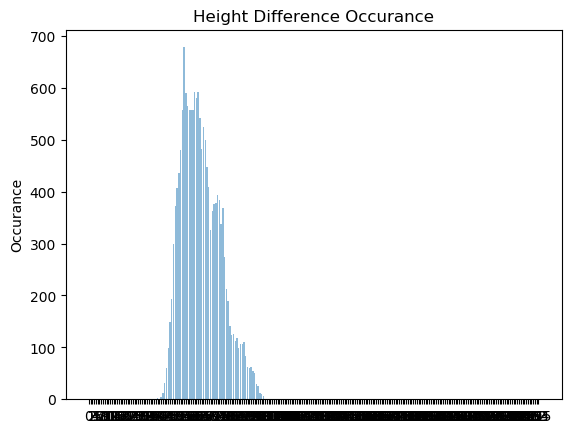

KL divergence is  19.152527
Peak index is  54


In [86]:
#print(heightDistributionreal)]
fakefolder = "HyperparameterData/LSGANadam0.0002l64b/testout"
image_count =0
data_avg = np.zeros(128*128,)
for filename in os.listdir(fakefolder):
    if filename.endswith(".png"): 
        imgfake = Image.open(fakefolder+"/"+filename)
        image_count = image_count +1
        imgfake1c = imgfake.convert('L')  #convert a gray scale
        #imgfake1c = imgfake1c.save(netGLoadDirectory+"/fakeImageData/"+filename)
        data = asarray(imgfake1c)
        data_avg = (data_avg+data.flatten())
    else:
        continue

heightDistributionfake = [0]*256
for pix_val in (data_avg/image_count).astype(int):
    heightDistributionfake[pix_val]+=1
#plot
objects = tuple(range(0,256))
#print(objects)
#print(type(objects))
y_pos = np.arange(len(objects))
performance = heightDistributionfake

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Occurance')
plt.title('Height Difference Occurance')
plt.show()


hist_fake = np.asarray(performance, dtype=np.float32)
hist_fake = hist_fake/sum(hist_fake)
hist_fake = hist_fake+10e-10
KL = kl_divergence(hist_real, hist_fake)
print("KL divergence is ", KL)
peak_index = performance.index(max(performance))
print("Peak index is ",peak_index)

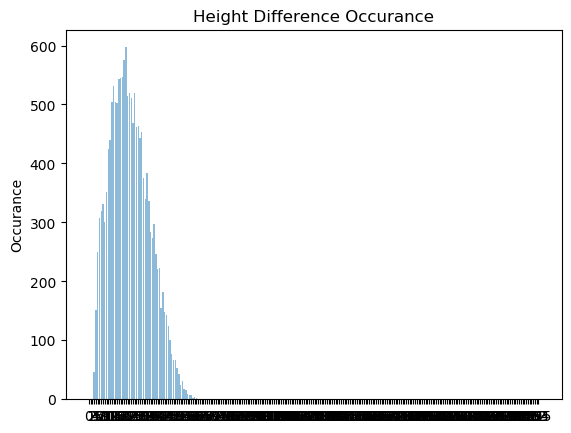

KL divergence is  2.1655831
Peak index is  21


In [87]:
#print(heightDistributionreal)]
fakefolder = "HyperparameterData/LSGANadam0.0008l8b/testout"
image_count =0
data_avg = np.zeros(128*128,)
for filename in os.listdir(fakefolder):
    if filename.endswith(".png"): 
        imgfake = Image.open(fakefolder+"/"+filename)
        image_count = image_count +1
        imgfake1c = imgfake.convert('L')  #convert a gray scale
        #imgfake1c = imgfake1c.save(netGLoadDirectory+"/fakeImageData/"+filename)
        data = asarray(imgfake1c)
        data_avg = (data_avg+data.flatten())
    else:
        continue

heightDistributionfake = [0]*256
for pix_val in (data_avg/image_count).astype(int):
    heightDistributionfake[pix_val]+=1
#plot
objects = tuple(range(0,256))
#print(objects)
#print(type(objects))
y_pos = np.arange(len(objects))
performance = heightDistributionfake

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Occurance')
plt.title('Height Difference Occurance')
plt.show()


hist_fake = np.asarray(performance, dtype=np.float32)
hist_fake = hist_fake/sum(hist_fake)
hist_fake = hist_fake+10e-10
KL = kl_divergence(hist_real, hist_fake)
print("KL divergence is ", KL)
peak_index = performance.index(max(performance))
print("Peak index is ",peak_index)

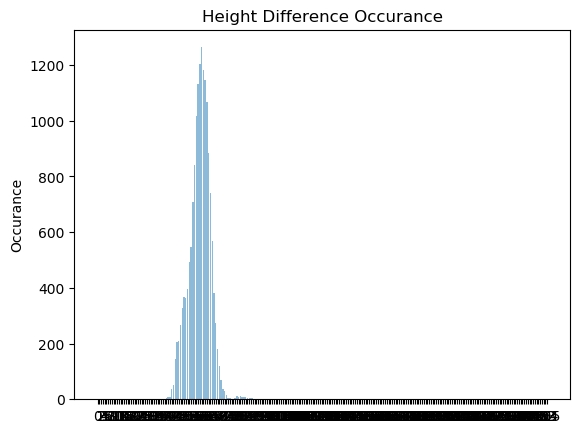

KL divergence is  19.152527
Peak index is  59


In [88]:
#print(heightDistributionreal)]
fakefolder = "HyperparameterData/LSGANadam0.0008l64b/testout"
image_count =0
data_avg = np.zeros(128*128,)
for filename in os.listdir(fakefolder):
    if filename.endswith(".png"): 
        imgfake = Image.open(fakefolder+"/"+filename)
        image_count = image_count +1
        imgfake1c = imgfake.convert('L')  #convert a gray scale
        #imgfake1c = imgfake1c.save(netGLoadDirectory+"/fakeImageData/"+filename)
        data = asarray(imgfake1c)
        data_avg = (data_avg+data.flatten())
    else:
        continue

heightDistributionfake = [0]*256
for pix_val in (data_avg/image_count).astype(int):
    heightDistributionfake[pix_val]+=1
#plot
objects = tuple(range(0,256))
#print(objects)
#print(type(objects))
y_pos = np.arange(len(objects))
performance = heightDistributionfake

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Occurance')
plt.title('Height Difference Occurance')
plt.show()


hist_fake = np.asarray(performance, dtype=np.float32)
hist_fake = hist_fake/sum(hist_fake)
hist_fake = hist_fake+10e-10
KL = kl_divergence(hist_real, hist_fake)
print("KL divergence is ", KL)
peak_index = performance.index(max(performance))
print("Peak index is ",peak_index)

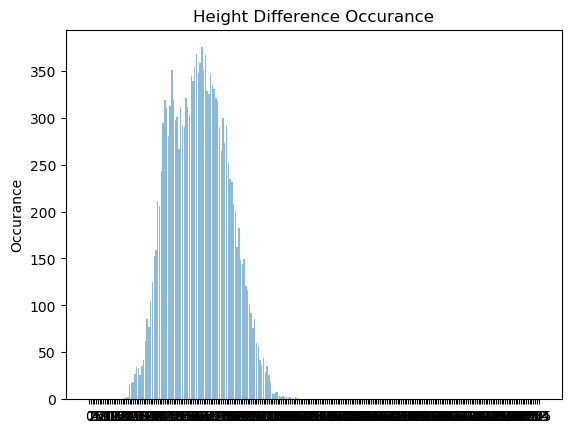

KL divergence is  4.28683
Peak index is  64


In [89]:
#print(heightDistributionreal)]
fakefolder = "HyperparameterData/LSGANadam2e-05l16b/testout"
image_count =0
data_avg = np.zeros(128*128,)
for filename in os.listdir(fakefolder):
    if filename.endswith(".png"): 
        imgfake = Image.open(fakefolder+"/"+filename)
        image_count = image_count +1
        imgfake1c = imgfake.convert('L')  #convert a gray scale
        #imgfake1c = imgfake1c.save(netGLoadDirectory+"/fakeImageData/"+filename)
        data = asarray(imgfake1c)
        data_avg = (data_avg+data.flatten())
    else:
        continue

heightDistributionfake = [0]*256
for pix_val in (data_avg/image_count).astype(int):
    heightDistributionfake[pix_val]+=1
#plot
objects = tuple(range(0,256))
#print(objects)
#print(type(objects))
y_pos = np.arange(len(objects))
performance = heightDistributionfake

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Occurance')
plt.title('Height Difference Occurance')
plt.show()


hist_fake = np.asarray(performance, dtype=np.float32)
hist_fake = hist_fake/sum(hist_fake)
hist_fake = hist_fake+10e-10
KL = kl_divergence(hist_real, hist_fake)
print("KL divergence is ", KL)
peak_index = performance.index(max(performance))
print("Peak index is ",peak_index)

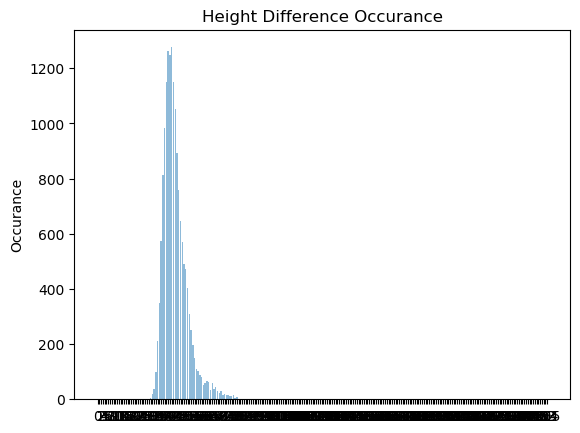

KL divergence is  5.474984
Peak index is  42


In [90]:
#print(heightDistributionreal)]
fakefolder = "HyperparameterData/LSGANadam0.0001l16b/testout"
image_count =0
data_avg = np.zeros(128*128,)
for filename in os.listdir(fakefolder):
    if filename.endswith(".png"): 
        imgfake = Image.open(fakefolder+"/"+filename)
        image_count = image_count +1
        imgfake1c = imgfake.convert('L')  #convert a gray scale
        #imgfake1c = imgfake1c.save(netGLoadDirectory+"/fakeImageData/"+filename)
        data = asarray(imgfake1c)
        data_avg = (data_avg+data.flatten())
    else:
        continue

heightDistributionfake = [0]*256
for pix_val in (data_avg/image_count).astype(int):
    heightDistributionfake[pix_val]+=1
#plot
objects = tuple(range(0,256))
#print(objects)
#print(type(objects))
y_pos = np.arange(len(objects))
performance = heightDistributionfake

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Occurance')
plt.title('Height Difference Occurance')
plt.show()


hist_fake = np.asarray(performance, dtype=np.float32)
hist_fake = hist_fake/sum(hist_fake)
hist_fake = hist_fake+10e-10
KL = kl_divergence(hist_real, hist_fake)
print("KL divergence is ", KL)
peak_index = performance.index(max(performance))
print("Peak index is ",peak_index)

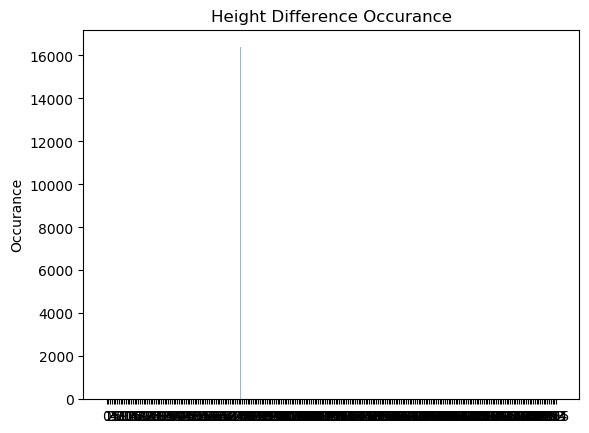

KL divergence is  19.152527
Peak index is  76


In [32]:
#print(heightDistributionreal)]
fakefolder = "HyperparameterData/LSGANSGDM0.01l16b/testout"
image_count =0
data_avg = np.zeros(128*128,)
for filename in os.listdir(fakefolder):
    if filename.endswith(".png"): 
        imgfake = Image.open(fakefolder+"/"+filename)
        image_count = image_count +1
        imgfake1c = imgfake.convert('L')  #convert a gray scale
        #imgfake1c = imgfake1c.save(netGLoadDirectory+"/fakeImageData/"+filename)
        data = asarray(imgfake1c)
        data_avg = (data_avg+data.flatten())
    else:
        continue

heightDistributionfake = [0]*256
for pix_val in (data_avg/image_count).astype(int):
    heightDistributionfake[pix_val]+=1
#plot
objects = tuple(range(0,256))
#print(objects)
#print(type(objects))
y_pos = np.arange(len(objects))
performance = heightDistributionfake

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Occurance')
plt.title('Height Difference Occurance')
plt.show()


hist_fake = np.asarray(performance, dtype=np.float32)
hist_fake = hist_fake/sum(hist_fake)
hist_fake = hist_fake+10e-10
KL = kl_divergence(hist_real, hist_fake)
print("KL divergence is ", KL)
peak_index = performance.index(max(performance))
print("Peak index is ",peak_index)

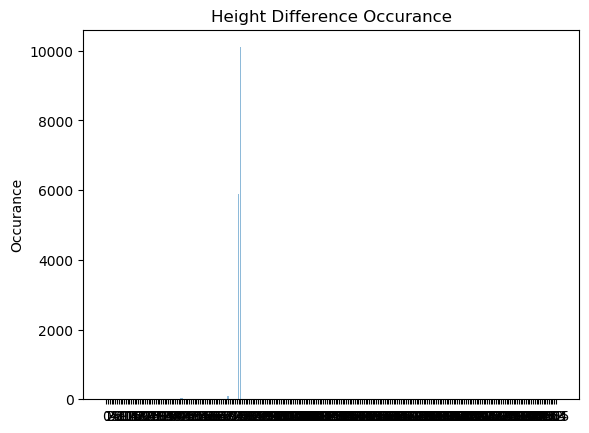

KL divergence is  14.5483
Peak index is  76


In [33]:
#print(heightDistributionreal)]
fakefolder = "HyperparameterData/LSGANSGDM0.001l16b/testout"
image_count =0
data_avg = np.zeros(128*128,)
for filename in os.listdir(fakefolder):
    if filename.endswith(".png"): 
        imgfake = Image.open(fakefolder+"/"+filename)
        image_count = image_count +1
        imgfake1c = imgfake.convert('L')  #convert a gray scale
        #imgfake1c = imgfake1c.save(netGLoadDirectory+"/fakeImageData/"+filename)
        data = asarray(imgfake1c)
        data_avg = (data_avg+data.flatten())
    else:
        continue

heightDistributionfake = [0]*256
for pix_val in (data_avg/image_count).astype(int):
    heightDistributionfake[pix_val]+=1
#plot
objects = tuple(range(0,256))
#print(objects)
#print(type(objects))
y_pos = np.arange(len(objects))
performance = heightDistributionfake

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Occurance')
plt.title('Height Difference Occurance')
plt.show()


hist_fake = np.asarray(performance, dtype=np.float32)
hist_fake = hist_fake/sum(hist_fake)
hist_fake = hist_fake+10e-10
KL = kl_divergence(hist_real, hist_fake)
print("KL divergence is ", KL)
peak_index = performance.index(max(performance))
print("Peak index is ",peak_index)